<div>
<img src="logo.jpg" width=150 ALIGN="left" style='margin-right:10px; border-style: solid; border-width: 2px;' alt='logo'>
<h1>Starting Kit - Fair-Universe </h1>
<h3>Background and Signal events classification</h3>
<br>
<p>
This starting kit will guide you step by step and will walk you through the data statistics and
examples. This will give you a clear idea of what this challenge is about and how you can
proceed further to solve the challenge.
</p>

<br>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
<p>
This code was tested with Python 3.10.7 | MSC v.1933 64 bit (AMD64) | (default, Jan 23 2023, 14:12:02) <br>
</p>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</p>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    <p>
This is a tabular data challenge for <b>Creation of an AI Challenge class</b> at  <b><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></b>
</p>
</div>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

## Introduction

High energy physicists at CERN use simulations in order to reproduce collisions that occurs in the LHC. Collisions between particles create thousands of smaller particles. Once they developped a theory which predicts the existence of a new particle, physicists run these simulations and seek for evidences of the new particle. To do so, they classify all the particles resulting from a collision between background particles (uninteresting ones that they already know) and signal particles (the ones they are interested in). This is why high-energy physicists are working increasingly closely with machine learning scientists.

To perform this classifications task they are tens of available features about each particle (such as its speed, its energy or some angles measurements). However, the simulations are prone to systematic biases and so it is for the data used for classification, which makes the task harder. Thus, a big challenge is to remove this biases from the data in order to improve the accuracy of classification.

The Fair Universe challenge is a toy-exemple for this problem. Instead of working in a high-dimensional feature space, we consider 2D points that belongs either to signal or background class. The aim is to build a model that classifies them correctly.
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
More formaly, this challenge uses 2-features and 1-class datasets
    
The datasets conistst of some points (or events) features:
1. `x1` for $x_1$-coordinate
2. `x2` for $x_2$-coordinate

The `y` column shows the class of the point : either 1 for signal or 0 for background. 
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
However, the data is plagued with bias. That is, there is a nuisance parameter that affects the points coordinates. For this starting-kit, we assume :

1. **the nuisance parameter affects all the points in the same way** (with no regard to their class)
2. the bias is just diagonal translation. That is, if we call $z$ the value of this nuisance parameter, then the actual coordinates in the dataset of each point $(x_1,x_2)$ is $(x_1+z,x_2+z)$

Then, one would legitimately want to simply remove $z$ to the coordinates of each point, but here is the trick : **the value of the nuisance parameter is unknown**
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

**References and credits:**  

 - Université Paris Saclay (https://www.universite-paris-saclay.fr/)  
 - ChaLearn (http://www.chalearn.org/)  
***

### Formalism (can be skipped in first-reading)

Let a **task** be a tuple $\left(p,\sigma_b,\sigma_s,\theta,l,\tau\right)$. 

Given a task $T$, we call **parameter** each element of $T$.

A context is a tuple $(\sigma,\theta,l)$.

Given a context $C=(\sigma,\theta,l)$, a **point generated in the context of $C$** is the realization of a random variable that follows a bivariate Gaussian law of parameters $(l\cos\theta,l\sin\theta)$ and $\begin{bmatrix}
    \sigma&0\\
    0&\sigma
\end{bmatrix}$

Given a nuisance direction $\alpha$ and a nuisance value $z$, let $\tau_{\alpha,z} : (\hat{x_1},\hat{x_2}) \mapsto (x_1,x_2) := (x_1+z\cos\alpha,x_2+z\sin\alpha)$.

Given a context $C$, $\alpha$ and $z$, a **labelled event for $z$ in the direction $\alpha$ in the context $C$** is a tuple $(x_1,x_2,c)$, where $(x_1,x_2)$ is the image by $\tau_{\alpha,z}$ of a point generated in the context of $C$.

Given a task $T = \left(p,\sigma_b,\sigma_s,\theta,l,\tau\right)$ and $z$, a **dataset for $T$ plagued by $z$** is a set containing $2000p$ labelled events for $z$ in the direction $\alpha$ in the context $(\sigma_b,\theta,l)$ and $2000(1-p)$ labelled events for $z$ in the direction $\alpha$ in the context $(\sigma_s,\theta,l)$.

For each labelled event $(x_1,x_2,c)$, we define its associated **event** $(x_1,x_2)$ and its **class** $c$.

The aim of this challenge is to build a learning model that, for any task, most accurately predicts the class of events no matter what nuisance value was used to generate them.

That is, your model has to be :
- in one hand, insensitive to the nuisance parameter $z$
- in the other hand, compliant to any task.

***
### Summary
The aim is to classify 2D data-points into signal or background classes. To do so, you are provided with several datasets, generated with different values of the nuissance parameter $z$. 

***

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
from sys import path

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# %matplotlib inline
# import matplotlib.pyplot as plt
# from sklearn.inspection import DecisionBoundaryDisplay


# # Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
# %load_ext autoreload
# %autoreload 2
# import seaborn as sns; sns.set()
# %reload_ext autoreload


## Directories

In [2]:
model_dir = 'sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

### Add directories to path

In [3]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)

## First step

### Import Data

In [4]:
from data_io import load_data, show_data_statistics, write

In [5]:
data_name = 'fair_universe_challenge'
data_dir = 'public_data' 

In [6]:
train_sets, test_sets = load_data(data_dir)

###-------------------------------------###
### Data Loading
###-------------------------------------###
[*] data dir :  public_data
[*] train dir :  public_data/train
[*] test dir :  public_data/test
[+] train dir found
[+] test dir found
[+] 3 train sets found
[+] 3 test sets found
[+] 3 train sets loaded
[+] 3 test sets loaded


### Data Statistics

In [7]:
show_data_statistics(train_sets, name="Train")

###-------------------------------------###
### Data Statistics Train
###-------------------------------------###
-------------------
Train Set 1
-------------------
[*] Total points:  2000
[*] Background points:  1800
[*] Signal points:  200
-------------------
Train Set 2
-------------------
[*] Total points:  2000
[*] Background points:  1800
[*] Signal points:  200
-------------------
Train Set 3
-------------------
[*] Total points:  2000
[*] Background points:  1800
[*] Signal points:  200


In [8]:
show_data_statistics(test_sets, name="Test")

###-------------------------------------###
### Data Statistics Test
###-------------------------------------###
-------------------
Train Set 1
-------------------
[*] Total points:  2000
[*] Background points:  1800
[*] Signal points:  200
-------------------
Train Set 2
-------------------
[*] Total points:  2000
[*] Background points:  1800
[*] Signal points:  200
-------------------
Train Set 3
-------------------
[*] Total points:  2000
[*] Background points:  1800
[*] Signal points:  200


### Data explanation

We provide `sample_data` with the starting kit, but to prepare your submission, you must fetch the `public_data` from the challenge website and point to it.

Just as high energy physicists can run their simulations as many time as they need, a particularity of this challenge is that along with some sample pieces of data, we provide you with python functions that allow you to generate your own data. It means you will be able to introduce the bias into the data with any value you want of the nuisance parameter.

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

We mentionned earlier that the value of the nuisance parameter remains unknown. It will be true for the test set : your model will not be provided the value of the nuisance parameter. Thus, we encourage you not to let your model know about the value you use to generate the data you train it on. Moreover, when they run the simulations, physicists don't know the value of the nuisance parameter, and since this challenge is about helping physicists to solve a problem, it's better to come up with a solution that fits their working conditions as much as possible.

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

`train_sets_list` is a list of 3 train sets each of which is generated with a different value of the nuisance parameter. The dataset at index :
- 0 was generated with z=0.5
- 1 was generated with z=1.4
- 2 was generated with z=1.8

`test_sets_list` is a list of 3 test sets each of which is generated with a different value of the nuisance parameter that we don't provide you with.

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

Each dataset contains two clusters of points, one of which corresponds to the signal points while the other one contains background points. To generate the points of each cluster, we use 2D-Gaussian random distribution.

In the plots below, red points represent signal events and blue points represent background events. All the points from test sets are black because their class is unknown. 

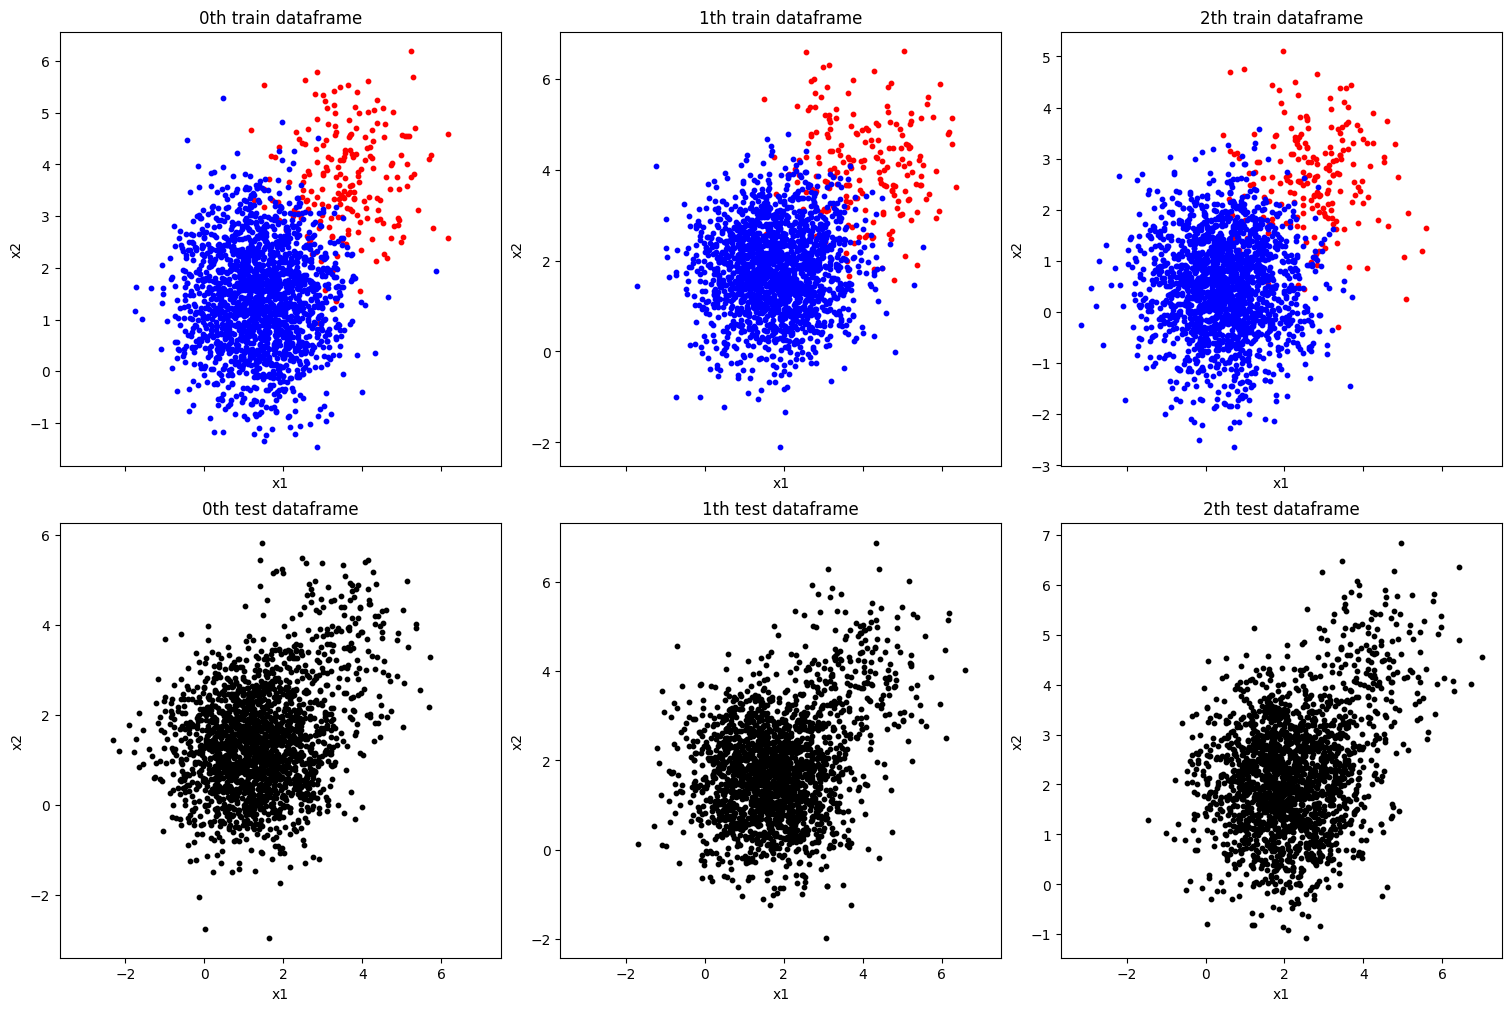

In [9]:
from visualize import show_train_test

show_train_test(train_sets,test_sets,save_figure=True)

In the train sets, we observe that there are far more background points than signal ones. This proportion reflects a struggle of real-life physic scenarios : the vast majority of particles is already known and there is only a few of them worth caring about.

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

More precisely, each dataset contains $1800$ background points and $200$ signal points

***
## Baselines
***

In this section, we introduced three baselinse to tackle the problem:

- Dumb baseline (doing nothing)
- Naive Bayes without data augmentation
- Naive Bayes with data augmentation

### Dumb Baseline
Here we have a dubm model which does not train and produces predictions which are just zeros

**Load Model**

In [10]:
# Import Dumb baseline
from dumb import Model

# Load Dumb baseline
dumb_model = Model()

**Load Data**

In [11]:
# Load Test Data
X_Tests = [test_set.drop('y', axis=1) for test_set in test_sets]
Y_Tests = [test_set["y"] for test_set in test_sets]

**Get Predictions**

In [12]:
# Get Predictions
dumb_Y_hat_tests = [dumb_model.predict(X_Test) for X_Test in X_Tests]

**Save Predictions**

In [13]:
# result directory 
predictions_dir = os.path.join(result_dir, "dumb")

# create result directory if not created
if not os.path.exists(predictions_dir):
    os.mkdir(predictions_dir) 


for index, dumb_Y_hat_test in enumerate(dumb_Y_hat_tests) :
    # result file name
    result_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")
    # save result
    write(result_name, dumb_Y_hat_test)

### Naive Bayes
Here we have a Naive Bayes Model which trains on one train dataset and is tested on all three test sets.

**Load Model**

In [14]:
# Import Naive Bayes baseline
from naive import Model

**Load Data**

In [15]:
# Train set
X_Trains = [train_set.drop('y', axis=1) for train_set in train_sets]
Y_Trains = [train_set["y"] for train_set in train_sets]

# Test set
X_Tests = [test_set.drop('y', axis=1) for test_set in test_sets]
Y_Tests = [test_set["y"] for test_set in test_sets]

**Model Name**

In [16]:
# Load Trained model 
trained_naive_model_name = model_dir + data_name + "_naive" # Model Name to load trained model
# my_naive_model = naive_bayes_model.load(trained_naive_model_name) # Reload saved model                    

**Train and Get Predictions**

In [17]:
nb_Y_hat_tests = []
for index, _ in enumerate(X_Trains):

    # Load Model
    naive_bayes_model = Model()

    # Train model if not trained
    if not(naive_bayes_model.is_trained):
        naive_bayes_model.fit(X_Trains[index], Y_Trains[index]) 

    # Get Predictions
    nb_Y_hat_tests.append(naive_bayes_model.predict(X_Tests[index]))

**Save Model**

In [18]:
# Save Model
naive_bayes_model.save(trained_naive_model_name)

**Save Predictions**

In [19]:
# result directory 
predictions_dir = os.path.join(result_dir, "naive_bayes")

# create result directory if not created
if not os.path.exists(predictions_dir):
    os.mkdir(predictions_dir) 


for index, nb_Y_hat_test in enumerate(nb_Y_hat_tests) :
    # result file name
    result_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")
    # save result
    write(result_name, nb_Y_hat_test)

### Naive Bayes - Data Augmentation
Here we have a Naive Bayes Model which trains on the augmented train datasets and is tested on all three test sets.

**Load Model**

In [21]:
# Import Naive Bayes baseline
from augmented_naive import Model

**Load Data**

In [22]:
# Train set
X_Trains = [train_set.drop('y', axis=1) for train_set in train_sets]
Y_Trains = [train_set["y"] for train_set in train_sets]

# Test set
X_Tests = [test_set.drop('y', axis=1) for test_set in test_sets]
Y_Tests = [test_set["y"] for test_set in test_sets]

**Train Model**

In [23]:
# Load Trained model 
trained_augmented_naive_model_name = model_dir + data_name + "_augmented_naive" # Model Name to load trained model
# my_naive_model = naive_bayes_model.load(trained_naive_model_name) # Reload saved model                     

**Get Predictions**

In [26]:
aug_nb_Y_hat_tests = []
for index, _ in enumerate(X_Trains):

    # Load Model
    augmented_naive_bayes_model = Model()

    # Train model if not trained
    if not(augmented_naive_bayes_model.is_trained):
        augmented_naive_bayes_model.fit(X_Trains[index], X_Tests[index], Y_Trains[index]) 

    # Get Predictions
    aug_nb_Y_hat_tests.append(augmented_naive_bayes_model.predict(X_Tests[index]))



**Save Model**

In [27]:
# Save Model
augmented_naive_bayes_model.save(trained_augmented_naive_model_name)

**Save Predictions**

In [28]:
# result directory 
predictions_dir = os.path.join(result_dir, "augmented_naive_bayes")

# create result directory if not created
if not os.path.exists(predictions_dir):
    os.mkdir(predictions_dir) 


for index, aug_nb_Y_hat_test in enumerate(aug_nb_Y_hat_tests) :
    # result file name
    result_name = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")
    # save result
    write(result_name, aug_nb_Y_hat_test)

In [58]:
# boundary_decisions_plot = show_boundary_decisions(my_augmented_model,
#                                                   pd.concat(train_sets_list),
#                                                   pd.concat(test_sets_list),
#                                                   True)

***
## Score and Comparisons
***

In this section, we evaluate the two baselines using AUC score. AUC stands for "Area Under the Curve". And the curve under which we measure the area is the ROC curve (Receiver Operating Characteristic curve). For two-classes classification, this curve is the plot of the true positive rate (TPR) as a function of the false positive rate (FPR) for all the values of a decision threshold.

**True Positive Rate**  (**TPR**) is a synonym for recall and is therefore defined as follows:
$$
TPR = \frac{TP}{TP+FN}
$$
**False Positive Rate**  (**FPR**) is defined as follows:
$$
FPR = \frac{FP}{FP+TN}
$$

<div style="text-align: center">
<img src="https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg" width="400"/>
<br>
ROC Curve showing TPR vs. FPR at different classification thresholds
</div>

For example, if we assume that a model's output is kind of a probability (a real number between $0$ and $1$) that the input is in signal class, then you can set a threshold $t$, and decide to classify an input as signal iff the ouput probility is greater than $t$. For each value of $t$, this defines both a TPR($t$) and a FPR($t$). Then the points of the ROC curve have coordinates (FPR($t$),TPR($t$)) for all $t$ between $0$ and $1$.

<div style="text-align: center">
<img src="https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg" width="400"/>
<br>
AUC (Area under the ROC Curve)
</div>

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

Source : https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=fr

In [27]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: auc_score


In [28]:

dumb_scores, naive_scores, augmented_naive_scores = [], [], []

for index in range(len(dumb_Y_hat_tests)) :

    # Dumb predictions
    result_name = os.path.join(result_dir, "dumb", "test_"+ str(index+1) + ".predictions")
    dumb_Y_hat_test = pd.read_csv(result_name, header=None)
    dumb_score = scoring_function(Y_Tests[index], dumb_Y_hat_test)
    dumb_scores.append(dumb_score)

    # Naive predictions
    result_name = os.path.join(result_dir, "naive_bayes", "test_"+ str(index+1) + ".predictions")
    naive_Y_hat_test = pd.read_csv(result_name, header=None)
    naive_score = scoring_function(Y_Tests[index], naive_Y_hat_test)
    naive_scores.append(naive_score)

    # Augmented Naive predictions
    result_name = os.path.join(result_dir, "augmented_naive_bayes", "test_"+ str(index+1) + ".predictions")
    augmented_naive_Y_hat_test = pd.read_csv(result_name, header=None)
    augmented_naive_score = scoring_function(Y_Tests[index], augmented_naive_Y_hat_test)
    augmented_naive_scores.append(augmented_naive_score)

In [29]:
score_df = pd.DataFrame([dumb_scores, naive_scores, augmented_naive_scores],
                        index = ["dumb model", "naive model","augmented naive model"],
                        columns = ["test_set 1","test_set 2","test_set 3"])
score_df.to_csv("scoring_output/individual_test_scores.csv")
score_df

,test_set 1,test_set 2,test_set 3
dumb model,0.500000,0.500000,0.500000
naive model,0.862778,0.937222,0.942778
augmented naive model,0.867500,0.935556,0.940833


In [30]:
average_test_score = pd.DataFrame([np.mean(dumb_scores),np.mean(naive_scores), np.mean(augmented_naive_scores)],
                                  index = ["dumb model", "naive model","augmented naive model"],
                                  columns=["average test score"])
average_test_score.to_csv("scoring_output/average_test_scores.csv")
average_test_score

,average test score
dumb model,0.500000
naive model,0.914259
augmented naive model,0.914630


## Submission

### Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

Here we only generate the submission for the augmented model.

In [25]:
scoring_output_dir = 'scoring_output'
solution_dir = "reference_data"
# !source activate deeplearning; 
!python $score_dir/score.py $solution_dir $result_dir $scoring_output_dir

###-------------------------------------###
### Using metric :  auc_score
###-------------------------------------###


###-------------------------------------###
### Test solutions :  2000
###-------------------------------------###


### Test solutions :  2000
###-------------------------------------###


### Test solutions :  2000
###-------------------------------------###


###-------------------------------------###
### Solutions files are ready!
###-------------------------------------###


======= Set 1 (Fair_universe_challenge_test_0): auc_score(set_score)=0.946666666667 =======
======= Set 2 (Fair_universe_challenge_test_1): auc_score(set_score)=0.920833333333 =======
======= Set 3 (Fair_universe_challenge_test_2): auc_score(set_score)=0.844722222222 =======


### Prepare the submission

In [26]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
# sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
# zipdir(sample_result_submission, result_dir)
print("Submit this file to codalab:\n" + sample_code_submission)

Submit this file to codalab:
../sample_code_submission_23-02-08-18-58.zip


## Conclusion

Now the data is in your hands. You have seen two baseline models to tackle the problem. Now it's your turn to experiment with your own strategies and to come up with better strategies than us :) 